<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/admission.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Admission 데이터를 대상으로 모델링 해서 대학원 입학 여부를 예측해 봅니다.
- kNN 알고리즘을 사용합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [3]:
# 상/하위 몇 개 행 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


**데이터 설명**

- GRE: GRE Scores (out of 340)
- TOEFL: TOEFL Scores (out of 120)
- RANK: University Rating (out of 5)
- SOP: Statement of Purpose Strength (out of 5)
- LOR: Letter of Recommendation Strength (out of 5)
- GPA: Undergraduate GPA (out of 10)
- RESEARCH: Research Experience (either 0 or 1)
- ADMIT: Chance of Admit (either 0 or 1)

In [4]:
# 하위 몇 개 행 확인
data.tail()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0
499,327,113,4,4.5,4.5,9.04,0,1


In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GRE       500 non-null    int64  
 1   TOEFL     500 non-null    int64  
 2   RANK      500 non-null    int64  
 3   SOP       500 non-null    float64
 4   LOR       500 non-null    float64
 5   GPA       500 non-null    float64
 6   RESEARCH  500 non-null    int64  
 7   ADMIT     500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [6]:
# 기술통계 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [ ]:
# 상관관계 확인
data.corr()

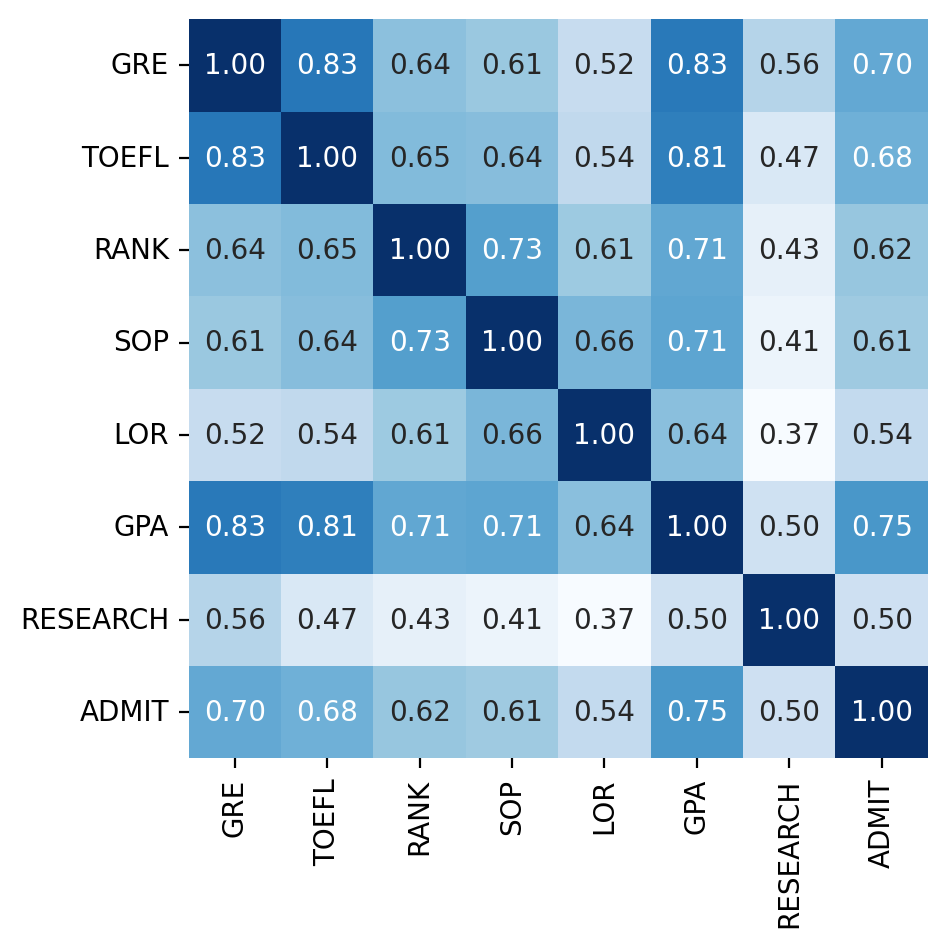

In [7]:
# 상관관계 시각화

sns.heatmap(data.corr(),
            annot=True,
            cmap = 'Blues',
            fmt='.2f',
            cbar=False,
            square=True)

plt.show()


# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [8]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop('ADMIT', axis=1)
y = data['ADMIT']

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘과 평가 방법을 사용합니다.
    - 알고리즘: KNeighborsClassifier
    - 평가방법: accuracy_score

In [10]:
# 1단계: 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
# 2단계: 선언하기
model = KNeighborsClassifier()

In [12]:
# 3단계: 학습하기
model.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [14]:
# 5단계: 평가하기
print('Accuracy Score:',accuracy_score(y_test, y_pred))

Accuracy Score: 0.84
